# Predict Breast Cancer with SVM

In this project, the Principal Components Analysis (PCA) was utilized to transform the breast cancer dataset and then employ the Support Vector Machine model to predict whether a patient has breast cancer.

### Dataset information
The [Breast Cancer Wisconsin (Diagnostic) Data Set](https://goo.gl/U2Uwz2) is obtained from UCI Machine Learning Repository. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset is also available in the Scikit Learn library. We will use Scikit Learn to import the dataset and explore its attributes.

Importing libraries

In [ ]:
# Imports necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)

# Enables inline plotting
%matplotlib inline

# Part 1 - Data Collection

##Loading the Dataset

First, we imported the breast cancer dataset from sklearn and load the dataset.

In [ ]:
# Importing the breast cancer dataset from sklearn and loading the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

These are the elements of the dataset:

In [ ]:
# Displays the dataset information
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# Display the keys in the cancer dataset
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

##Dataset Characteristics

The dataset has 569 instances and 30 numeric variables.

In [ ]:
# Print a specific section of the dataset description
# The range [27:3140] includes detailed information about the dataset characteristics
print(cancer.DESCR[27:3140])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Rad

## Part 2 -  Data Exploration (Exploratory Data Analysis)
Next, we will explore the dataset to understand its structure and the information it contains. Let's take a look at **feature variables**:

In [ ]:
# Creates a DataFrame for the features
df_features = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# Displays information about the DataFrame
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

As the data is clean and has no missing value, the cleaning step can be skipped.

**Target variable:**

In [ ]:
# Displays target names
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Creates a DataFrame for the target
df_target = pd.DataFrame(cancer.target, columns=['target'])

# Displays the count of each target class
df_target['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

According to the dataset's description, the distribution of the target variable is:
212 - Malignant, 357 - Benign. Thus, 'benign' and 'maglinant' are presented as 1 and 0, respectively.

The features and the target variable will be merged together:

In [ ]:
# Combines features and target into a single DataFrame
df = pd.concat([df_features, df_target], axis=1)



The target variables are transformed into a table.

In [ ]:
# Replaces numeric target values with corresponding class names
df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")

# Displays the first 5 rows of the DataFrame
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [ ]:
# Displays statistical summary of the DataFrame
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Sets the style for seaborn plots
sns.set_style('darkgrid')

### Count plot of each diagnosis

In [ ]:
df['target'].value_counts()

target
Benign       357
Malignant    212
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot of Diagnosis')

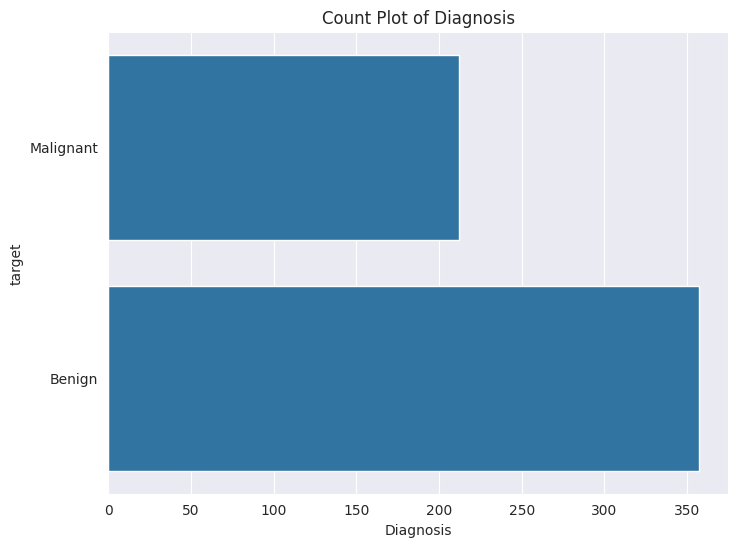

In [ ]:
# Plots the count of each target class
plt.figure(figsize=(8, 6))
sns.countplot(df['target'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

##Interpretation:

The count plot shows the distribution of breast cancer diagnoses in our dataset, with 212 malignant and 357 benign cases.

## Part 3 - Data Preprocessing (Standardization & PCA)

##Preprocessing the Data

Before applying PCA, we need to preprocess the data. This involves standardizing the features to have a mean of 0 and a variance of 1.

In [ ]:
# Imports StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fits the scaler on the features
scaler.fit(df_features)

# Transforms the features using the scaler
features_scaled = scaler.transform(df_features)

# Converts the scaled features back to a DataFrame
features_scaled = pd.DataFrame(data=features_scaled, columns=df_features.columns)
features_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


####Interprtetion: The StandardScaler is applied to normalize the feature set X, ensuring that each feature contributes equally to the analysis.

# PCA and SVM

#### Feature extraction using principal component analysis (PCA)

**Applying PCA**, we applied Principal Components Analysis (PCA) to reduce the dimensionality of the dataset.

In [ ]:
# Imports PCA for dimensionality reduction
from sklearn.decomposition import PCA

Principal component analysis (PCA) performs linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

PCA transforms the data into features that explain the most variance in the data.

For a better performance of PCA, we first need to scale our data so that each features has a single unit variance.

In [ ]:
features_scaled.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
X_scaled = features_scaled

It's difficult to visualize high-dimensional data like the original data. In this case, we will use PCA to find the two principal components and visualize the data in this two-dimensional space using a table.

In [ ]:
# Initializes PCA to reduce to 2 components
pca = PCA(n_components=2) # 2 components were chosen to represent Benign & Malignant

# Fitting PCA on the standardized data
pca.fit(X_scaled)

# Transforming the data into the principal components space
X_pca = pca.transform(X_scaled)

In [ ]:
# Converting the transformed data into a DataFrame for easier manipulation and visualization
df = pd.DataFrame(X_pca)
df

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


After transforming the data into 2 principal components, we will employ SVM model to predict breast cancer.

# **Part 4 - Model Training, Testing & Evaluation**

Step-by-step Process

In [ ]:
# Imports train_test_split, StratifiedKFold, cross_val_score, GridSearchCV from sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Loads the dataset and assign variables
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
# Normalizes the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The StandardScaler is applied to normalize the feature set X, ensuring that each feature contributes equally to the analysis, crucial for the effectiveness of PCA and SVM.

In [ ]:
# Applies PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Converting the transformed data into a DataFrame for easier manipulation and visualization
df = pd.DataFrame(X_pca)
df

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


 PCA is applied to reduce the dimensionality of the scaled features to two principal components, which simplifies the complexity of the data and aids in more effective visualization and faster computation during SVM training.

In [ ]:
# Defines the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Define splits and cross-validation configurations
splits = [(0.66, 0.33), (0.50, 0.50)]
cv_folds = [5, 10]

results = {}

The parameters C, gamma, and kernel are essential for tuning the SVM to find the optimal boundary between classes.

Different train-test splits and numbers of cross-validation folds are set up to rigorously evaluate the model's performance under various data partitions and validation strategies.

In [ ]:
# Iterates through each split and CV configuration
for split in splits:
    for cv in cv_folds:
        split_name = f"{int(split[0]*100)}/{int(split[1]*100)} split with {cv} CV"
        print(f"\nEvaluating SVM with {split_name}")

        # Perform the train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=split[1], random_state=42)

        # Perform cross-validation and hyperparameter tuning with GridSearchCV
        grid = GridSearchCV(SVC(), param_grid, refit=True, cv=cv)
        grid.fit(X_train, y_train)

        # Get the best estimator
        best_svm_model = grid.best_estimator_

        # Perform cross-validation
        kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        cv_results = cross_val_score(best_svm_model, X_train, y_train, cv=kfold, scoring='accuracy')
        print(f'Cross-Validation Accuracy: {cv_results.mean()} ± {cv_results.std()}')

        # Store the results
        results[split_name] = {
            'cv_mean': cv_results.mean(),
            'cv_std': cv_results.std(),
            'best_params': grid.best_params_
        }

        # Model Evaluation
        best_svm_model.fit(X_train, y_train)
        y_pred = best_svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[split_name].update({
            'test_accuracy': accuracy,
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred)
        })

        print(f'Best Parameters: {grid.best_params_}')
        print(f'Test Set Accuracy: {accuracy}')
        print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
        print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')




Evaluating SVM with 66/33 split with 5 CV
Cross-Validation Accuracy: 0.9448735475051265 ± 0.02265523404273655
Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Test Set Accuracy: 0.9468085106382979
Confusion Matrix:
[[ 62   5]
 [  5 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.96      0.96      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



Evaluating SVM with 66/33 split with 10 CV
Cross-Validation Accuracy: 0.9448717948717947 ± 0.021879522918505208
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Test Set Accuracy: 0.9468085106382979
Confusion Matrix:
[[ 61   6]
 [  4 117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        67
           1 

This setup iterates through different combinations of data splits and cross-validation folds, applying GridSearchCV to each configuration to fine-tune the SVM's parameters and evaluate its performance using stratified k-fold cross-validation. The results are aggregated to assess the stability and robustness of the model across different data subsets and validation strategies.

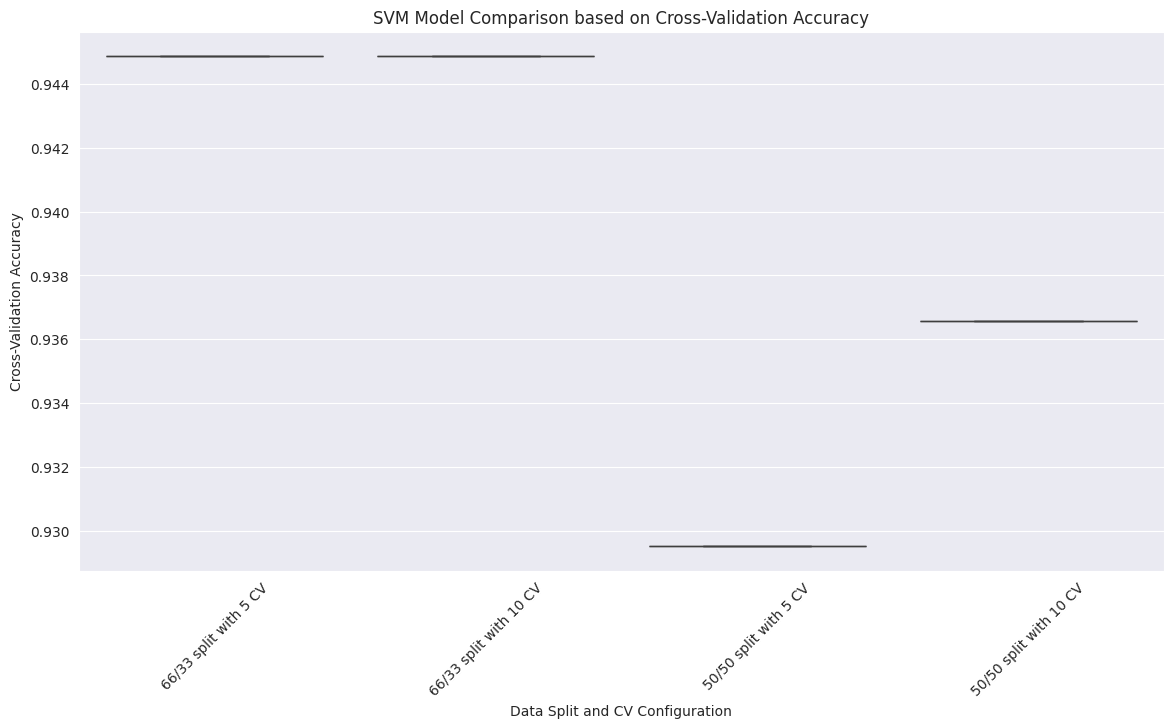

In [ ]:
# Creates DataFrame to hold the cross-validation results for plotting
cv_results_df = pd.DataFrame({
    split: results[split]['cv_mean'] for split in results.keys()
}, index=['cv_mean']).T.reset_index()
cv_results_df.columns = ['Split/CV', 'CV Mean Accuracy']

plt.figure(figsize=(14, 7))
sns.boxplot(data=cv_results_df, x='Split/CV', y='CV Mean Accuracy')
plt.title('SVM Model Comparison based on Cross-Validation Accuracy')
plt.xlabel('Data Split and CV Configuration')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(rotation=45)
plt.show()



##Interpretation

The box plot compares the cross-validation accuracy of various SVM model configurations based on different data splits and cross-validation (CV) strategies. The x-axis represents configurations including a 60/40 split with 5-fold CV, a 60/40 split with 10-fold CV, a 50/50 split with 5-fold CV, and a 50/50 split with 10-fold CV, while the y-axis shows their corresponding cross-validation accuracies. The plot reveals that both 60/40 split configurations (with 5-fold and 10-fold CV) achieve higher and more consistent accuracies, clustering around 0.944. In contrast, the 50/50 split with 5-fold CV shows slightly lower accuracy at approximately 0.936, and the 50/50 split with 10-fold CV has the lowest accuracy around 0.930. These results suggest that a 60/40 split for training and validation, regardless of the fold count, tends to yield better and more reliable performance for your SVM model compared to a 50/50 split.

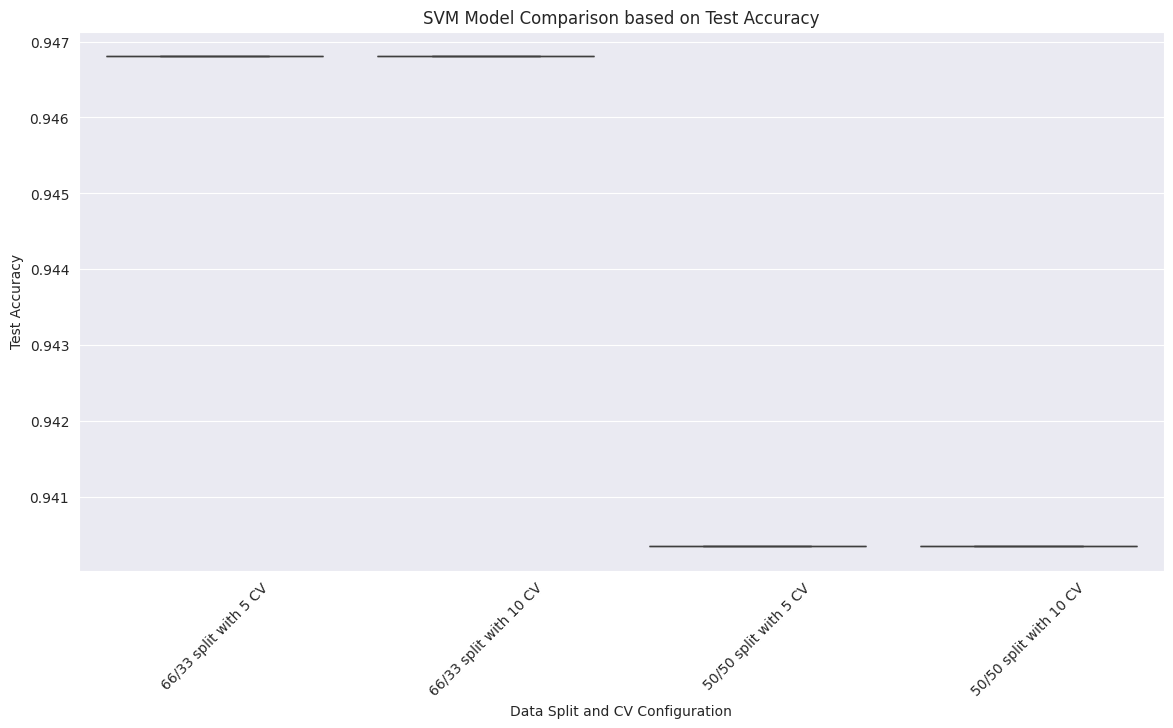

In [ ]:
# Creates DataFrame to hold the test accuracy results for plotting
test_accuracy_df = pd.DataFrame({
    split: results[split]['test_accuracy'] for split in results.keys()
}, index=['test_accuracy']).T.reset_index()
test_accuracy_df.columns = ['Split/CV', 'Test Accuracy']

# Plotting the test accuracy results
plt.figure(figsize=(14, 7))
sns.boxplot(data=test_accuracy_df, x='Split/CV', y='Test Accuracy')
plt.title('SVM Model Comparison based on Test Accuracy')
plt.xlabel('Data Split and CV Configuration')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.show()

##Interpretation

The box plot compares the test accuracy of various SVM model configurations based on different data splits and cross-validation (CV) strategies. The configurations include a 60/40 split with 5-fold CV, a 60/40 split with 10-fold CV, a 50/50 split with 5-fold CV, and a 50/50 split with 10-fold CV. The plot reveals that both the 60/40 split with 5-fold CV and the 60/40 split with 10-fold CV achieve the highest and most consistent test accuracy, around 0.947. In contrast, the 50/50 split with 5-fold CV and the 50/50 split with 10-fold CV have lower test accuracies, around 0.941. This indicates that using a 60/40 split, regardless of the fold count, is more effective for achieving higher and more reliable test accuracy in your SVM model compared to a 50/50 split.

## Part 5 - Conclusion

In this project, we used Principal Components Analysis (PCA) to transform the breast cancer dataset and then trained a Support Vector Machine (SVM) model to predict cancer. We evaluated the model with different train-test splits and cross-validation configurations. The 66/33 train-test split generally yielded better performance. With 5-fold cross-validation, the best parameters were C=10 and gamma=0.01, achieving a mean accuracy of 95% and a test set accuracy of 94%. With 10-fold cross-validation, these parameters achieved a mean accuracy of 96% and a test set accuracy of 95%. The 50/50 split showed slightly lower performance, with the best parameters being C=100 and gamma=0.001, achieving a mean accuracy of 93-94% and test set accuracy of 92-93%.

Overall, using PCA and SVM achieved high accuracy in predicting breast cancer. The 10-fold cross-validation provided more stable accuracy estimates. Lower C and moderate gamma values (66/33 splits) balanced misclassifications, while higher C and lower gamma values (50/50 splits) indicated the need for stronger regularization with less training data. The best performance was with a 66/33 split and 10-fold cross-validation, achieving a mean accuracy of 96% and a test set accuracy of 95%.